# Phase-1-project


## Exploritory analysis of best performing films at the box office

### Problem Statement
 Exploring what type of films are currently doing the best at the box office in order to help Microsoft's new movie studio decide on what types of films to create

### Objectives
* To indentify which type of films have the highest votes

* To identify the films with the highest gross

* To find the average duration of a film

* To find the estimated cost(budget) of creating a film



### Data Understanding

In [5]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
#Creating a function to load data sets using pandas
def open_files (file_path):
    df = pd.read_csv(file_path, delimiter= ',',index_col= 0 )
    return df

In [7]:
#calling the function to open the data set
basics_df = open_files("/home/elsie/Documents/Phase-1-project/Data/title.basics.csv")
basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [8]:
#Getting information about the data set
basics_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


 * From the basics dataset all the columns have the required data types,as we see columns containing strings are type object,columns containing numeric values are type int64 and columns containing decimals are float64

* There are missing values in original_title,runtime_minutes and genres columns as there are 146144 entries and this columns contain less non-null values.

* The index column contains alphanumeric unique identifier of the title of the movie

* The missing values have a place holder NAN

In [9]:
ratings_df = open_files("/home/elsie/Documents/Phase-1-project/Data/title.ratings.csv")
ratings_df

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [10]:
ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


* From the ratings dataset all the columns have the required data types,as we see columns containing strings are type object,columns containing numeric values are type int64 and columns containing decimals are float64

* There are no missing values.

* The index column contains alphanumeric unique identifier of the title of the movie

In [11]:
budget_df = open_files("/home/elsie/Documents/Phase-1-project/Data/tn.movie_budgets.csv")
budget_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [12]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


* From the budget dataset we see that there are no missing values.

* All the columns have the required data type

### Data Preparation

#### Data cleaning


In [14]:
# The basics data set contained missing values
# The columns that contained missing values were original title,runtime minutes and genres
# Getting the sum of all missing values in the specific columns

print(basics_df['original_title'].isnull().sum())

#Getting percentage of the missing values

print(basics_df['original_title'].isnull().sum()/len(basics_df['original_title']))
# missing values were only 21

21
0.00014369389095686446


In [15]:
# Filling the mising values with a constant 'UNKNOWN'
basics_df['original_title']= basics_df['original_title'].fillna('UNKNOWN')

basics_df['original_title'].isna().sum()

0

Replacing missing values with unknown since the percentage of the missing values in the original_title ccolumn is so small.

We also have all the names for the primary titles


In [16]:
#Checking for the runtime column
print(basics_df['runtime_minutes'].isnull().sum())

#Getting percentage of the missing values

print(basics_df['runtime_minutes'].isnull().sum()/len(basics_df['runtime_minutes']))

#missing values made 21% of the data set which is a high percentage


31739
0.21717620976571053


In [17]:
#Checking for missing values in the genres column
print(basics_df['genres'].isnull().sum())

#Getting percentage of the missing values

print(basics_df['genres'].isnull().sum()/len(basics_df['genres']))

#The missing values made up 3% of the missing data in the genre columns




5408
0.037004598204510616


In [18]:
# Taking the rows of genres that are not null
basics_df = basics_df[basics_df['genres'].notna()]

basics_df['genres'].isna()


tconst
tt0063540    False
tt0066787    False
tt0069049    False
tt0069204    False
tt0100275    False
             ...  
tt9916428    False
tt9916538    False
tt9916622    False
tt9916706    False
tt9916754    False
Name: genres, Length: 140736, dtype: bool

In [19]:
#replacing the missing values in the runtime column with the median
print(basics_df['runtime_minutes'].apply(['mean','median']))
basics_df['runtime_minutes']= basics_df['runtime_minutes'].fillna(value = basics_df['runtime_minutes'].median() )
basics_df['runtime_minutes'].isna().sum()
basics_df.info()

mean      86.261902
median    87.000000
Name: runtime_minutes, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 140736 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    140736 non-null  object 
 1   original_title   140736 non-null  object 
 2   start_year       140736 non-null  int64  
 3   runtime_minutes  140736 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.5+ MB


<ipython-input-19-ad93f6ff7a55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics_df['runtime_minutes']= basics_df['runtime_minutes'].fillna(value = basics_df['runtime_minutes'].median() )


Replaces the missing values in the runtime column with the median since the missing values were 21% which was a large amount of data to drop

In [20]:
# In the budget data set, in order to perform any analysis on the budget,,domestic and worldwide gross columns we have to 
#First remove the dolar sign and the convert them to integers
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
budget_df.iloc[10:100]

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099"
12,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347"
13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115"
14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
15,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240"
...,...,...,...,...,...
96,"Mar 8, 2019",Captain Marvel,"$175,000,000","$426,525,952","$1,123,061,550"
97,"Apr 15, 2016",The Jungle Book,"$175,000,000","$364,001,123","$962,854,547"
98,"Jun 19, 2015",Inside Out,"$175,000,000","$356,461,711","$854,235,992"


In [22]:
#Writing a function to remove to remove the dolar sign,commas and convert the comuln data time to type in 
def clean(df ,column):
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].astype(int)
         
    return df[column]
    
    

In [23]:
budget_df['production_budget']= clean(budget_df,'production_budget')
budget_df['production_budget']



<ipython-input-22-54f9870bd92b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$', '')


id
1     425000000
2     410600000
3     350000000
4     330600000
5     317000000
        ...    
78         7000
79         6000
80         5000
81         1400
82         1100
Name: production_budget, Length: 5782, dtype: int64

In [24]:
budget_df['domestic_gross'] = clean(budget_df,'domestic_gross')
budget_df['domestic_gross'].dtype

<ipython-input-22-54f9870bd92b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$', '')


dtype('int64')

In [25]:
budget_df['worldwide_gross'] = clean(budget_df,'worldwide_gross')
budget_df['worldwide_gross'].dtype

<ipython-input-22-54f9870bd92b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$', '')


dtype('int64')

In [26]:
budget_df.info()
budget_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 400.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


All the three columns are now coverted into integers

In [30]:
#converting the release_date column to date_time

budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])
budget_df['release_date']

id
1    2009-12-18
2    2011-05-20
3    2019-06-07
4    2015-05-01
5    2017-12-15
        ...    
78   2018-12-31
79   1999-04-02
80   2005-07-13
81   2015-09-29
82   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [31]:
#creating a column to only get the year of the release
budget_df['start_year'] = budget_df['release_date'].dt.year
budget_df.head()
budget_df['start_year'].value_counts()

2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1958      1
1915      1
1927      1
1931      1
1930      1
Name: start_year, Length: 96, dtype: int64

In [32]:
# creating a new budget df with only movies released from 2010 since the basics data set focuses on movies released from 2010
new_budget_df = budget_df [(budget_df['start_year'] >= 2010)]
new_budget_df.info()
new_budget_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 2 to 81
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2194 non-null   datetime64[ns]
 1   movie              2194 non-null   object        
 2   production_budget  2194 non-null   int64         
 3   domestic_gross     2194 non-null   int64         
 4   worldwide_gross    2194 non-null   int64         
 5   start_year         2194 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 120.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
id,,,,,,
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
...,...,...,...,...,...,...
62,2014-12-31,Stories of Our Lives,15000,0,0,2014
72,2015-05-19,Family Motocross,10000,0,0,2015
73,2012-01-13,Newlyweds,9000,4584,4584,2012


In [33]:
#Since ratings and basics share the same index columns,we can do a join to better understand the ratings dataset
combined_df = basics_df.join(ratings_df,how= 'inner')
combined_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [34]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73052 non-null  object 
 1   original_title   73052 non-null  object 
 2   start_year       73052 non-null  int64  
 3   runtime_minutes  73052 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73052 non-null  float64
 6   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


### Data Analysis


#### Data exploration

Text(0, 0.5, 'count of films')

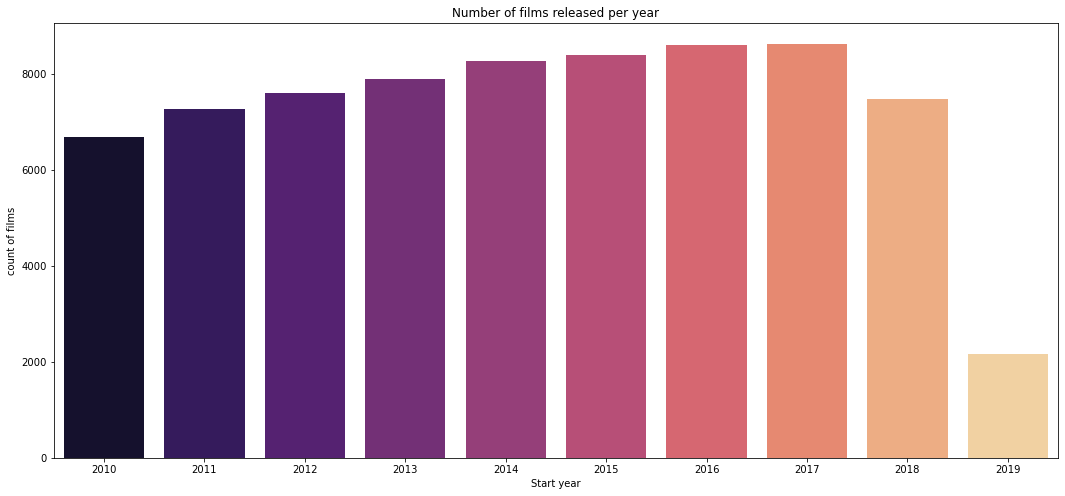

In [36]:
#Getting the number of movies released per year
year = combined_df['start_year'].value_counts()
fig, ax = plt.subplots( figsize = ( 18,8))
ax = sns.barplot(x = year.index ,y = year, palette = 'magma')
ax.set_title("Number of films released per year")
ax.set_xlabel("Start year")
ax.set_ylabel("count of films")


Text(0, 0.5, 'count of films')

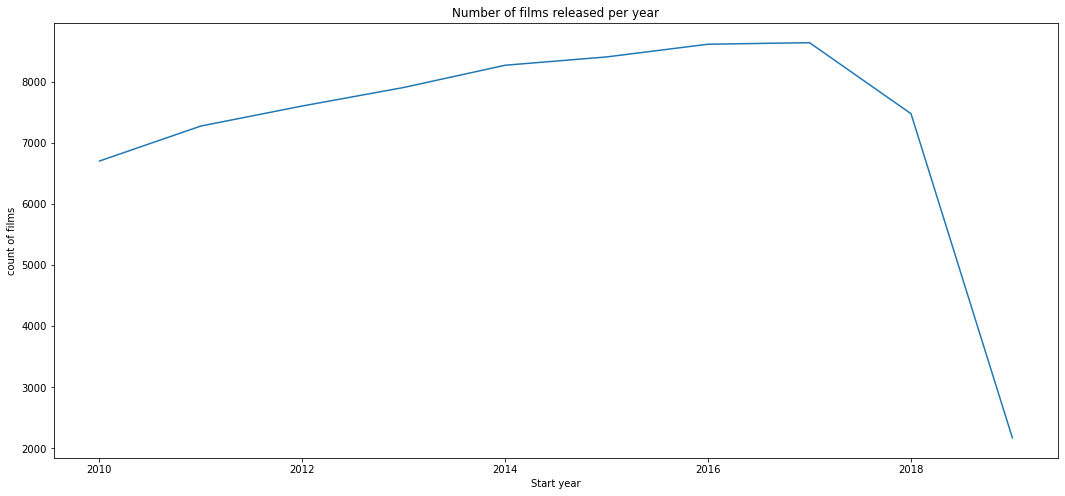

In [37]:
year = combined_df['start_year'].value_counts()
fig, ax = plt.subplots( figsize = ( 18,8))
sns.set_style('darkgrid')
ax = sns.lineplot(x = year.index ,y = year,)
ax.set_title("Number of films released per year")
ax.set_xlabel("Start year")
ax.set_ylabel("count of films")


* From the plot, we see there is a significant rise in the number of movies released from the year 2010 to 2017

* Though from 2018 there is drop and it even gets worse in 2019 with slightly above 2000 movies released that year

In [38]:
#Getting summary statistics of runtime minutes column
summary = combined_df['runtime_minutes'].describe()

Text(0.5, 1.0, 'Boxplot of runtime minutes')

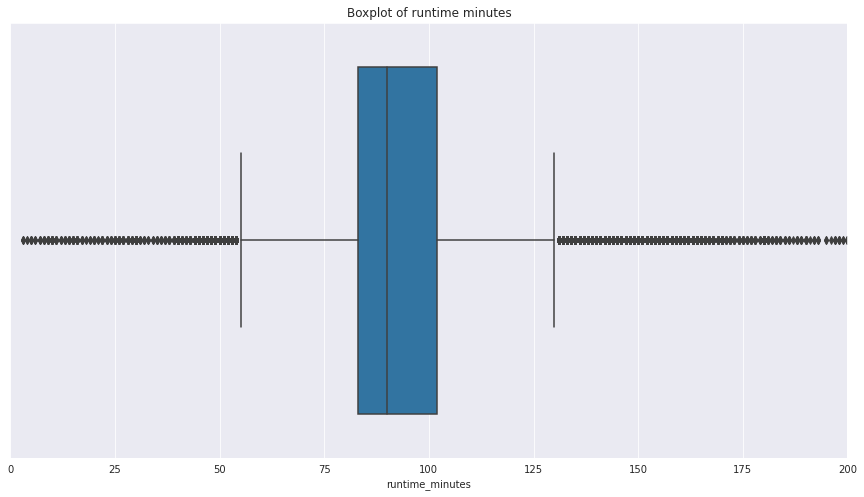

In [131]:

fig,ax = plt.subplots( figsize = (15,8))
ax = sns.boxplot(x = combined_df['runtime_minutes'])
ax.set_xlim(0,200)
ax.set_title("Boxplot of runtime minutes")

Text(0.5, 1.0, 'Distribution of runtime minutes')

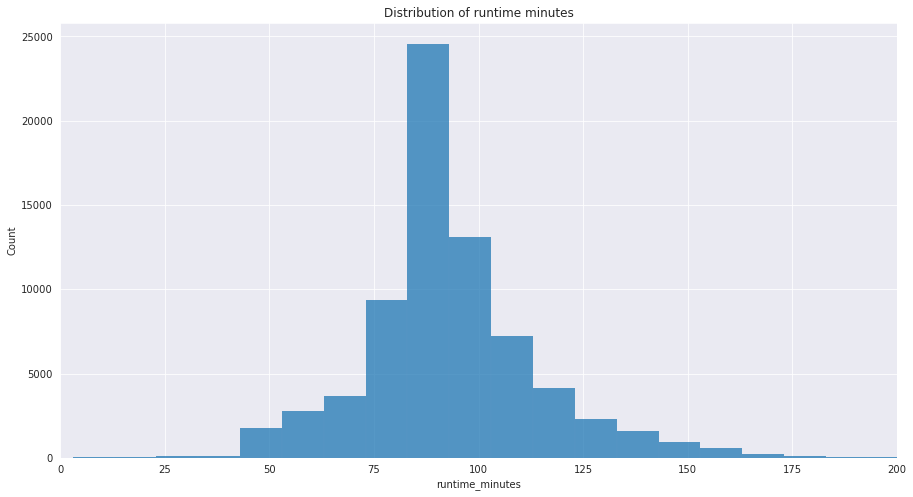

In [133]:
#Distribution of runtime minutes
fig,ax = plt.subplots( figsize = (15,8))
ax = sns.histplot(x = combined_df['runtime_minutes'],binwidth = 10)
ax.set_xlim(0, 200)
ax.set_title("Distribution of runtime minutes")


In [40]:
print(summary)



count    73052.000000
mean        93.956209
std        198.605431
min          3.000000
25%         83.000000
50%         90.000000
75%        102.000000
max      51420.000000
Name: runtime_minutes, dtype: float64


* From the above plot and summary  we see that runntime column has extreme outliers with the max value being 51420 minutes and the minimum being 3 minutes. 

* This could be due to the nature of the films,others are movies while others are series with many episodes

* Despite the outliers the mean(93.966) and the median(90) are not so far apart which means the outliers don't have extreme effects on the mean

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Documentary'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Comedy,Drama'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Drama,Romance'),
  Text(7, 0, 'Comedy,Romance'),
  Text(8, 0, 'Comedy,Drama,Romance'),
  Text(9, 0, 'Horror,Thriller'),
  Text(10, 0, 'Drama,Thriller'),
  Text(11, 0, 'Action'),
  Text(12, 0, 'Romance'),
  Text(13, 0, 'Biography,Documentary'),
  Text(14, 0, 'Documentary,Drama'),
  Text(15, 0, 'Documentary,Music'),
  Text(16, 0, 'Comedy,Horror'),
  Text(17, 0, 'Action,Crime,Drama'),
  Text(18, 0, 'Crime,Drama,Thriller'),
  Text(19, 0, 'Crime,Drama')])

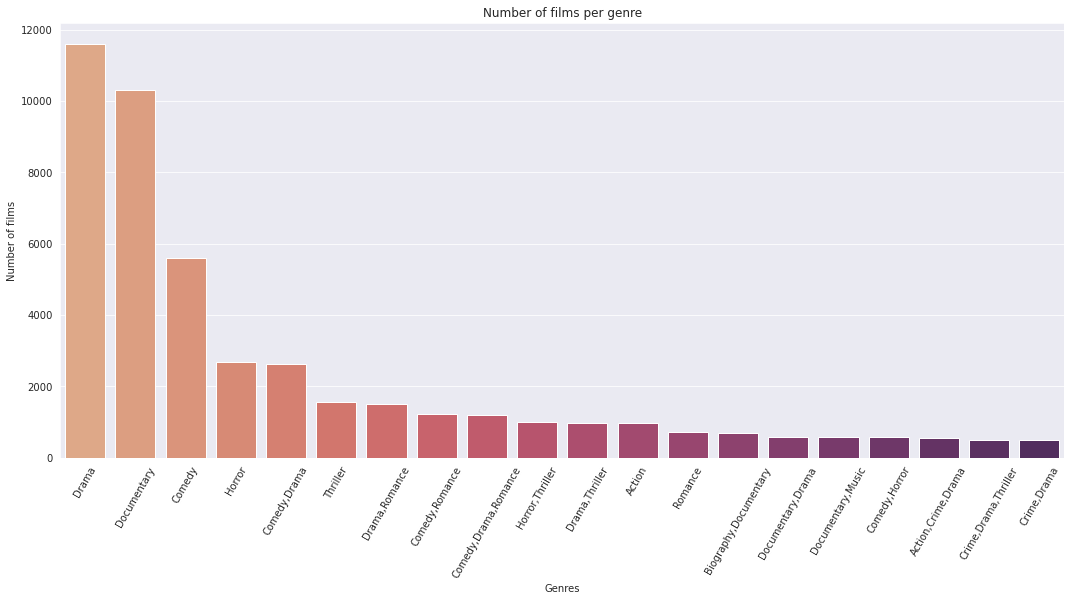

In [41]:
#Checking genres with the highest number of films
genre= combined_df['genres'].value_counts()[:20]
fig, ax = plt.subplots( figsize = ( 18,8))
ax = sns.barplot(x = genre.index ,y = genre, palette = 'flare')
ax.set_title("Number of films per genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Number of films")
plt.xticks(rotation = 60)


* From the bar plot most films released were drama with more than 10,000 films,followed by documentaries and then commedy

* We also see that there are a number of films that fall on more than one genre

In [78]:
#sorting the numvotes column to get the films with the highest number of votes 
sorted_votes= combined_df.sort_values(by= ['numvotes'],ascending= False)
highest_votes = sorted_votes.iloc[:20]
lowest_votes = sorted_votes.iloc[-21:-1]


In [43]:
# Defining a function to plot bar plots
def plot_bar(df,column1,column2, title,xlabel,ylabel):
    fig, ax = plt.subplots( figsize = ( 18,8))
    ax = sns.barplot(x = df[column1], y= df[column2])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation = 80)
    


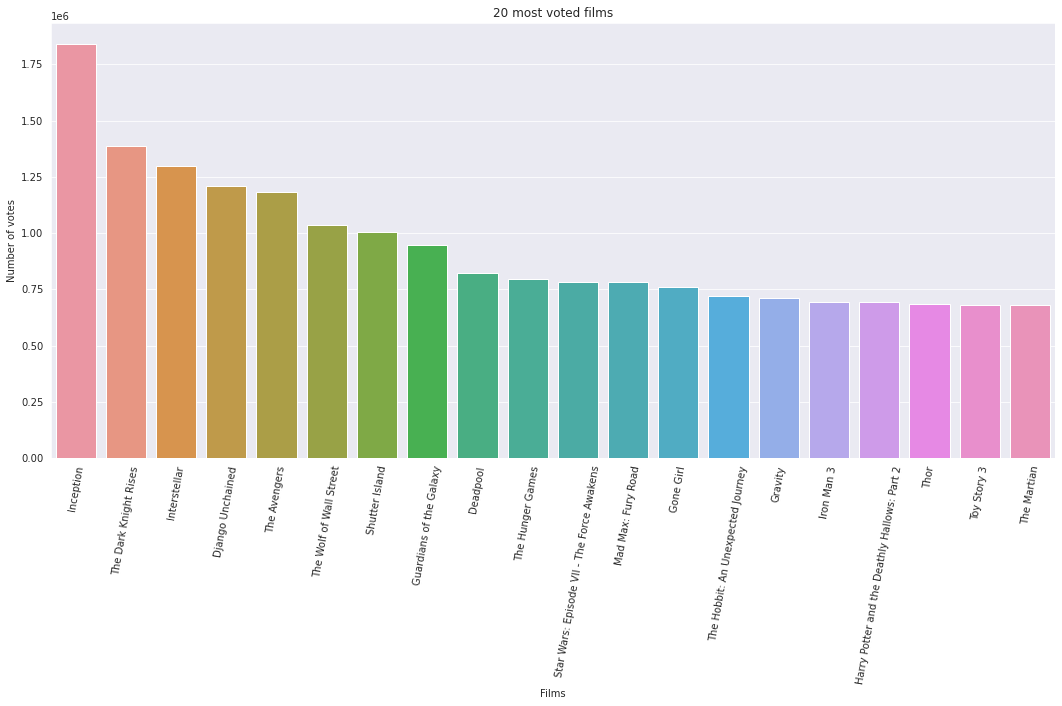

In [44]:
plot_bar(highest_votes,
'primary_title',
'numvotes',
"20 most voted films",
'Films',
"Number of votes")

* Inception had the highest number of votes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action,Adventure,Sci-Fi'),
  Text(1, 0, 'Action,Adventure,Fantasy'),
  Text(2, 0, 'Adventure,Animation,Comedy'),
  Text(3, 0, 'Drama'),
  Text(4, 0, 'Comedy,Drama,Romance'),
  Text(5, 0, 'Action,Adventure,Comedy'),
  Text(6, 0, 'Comedy'),
  Text(7, 0, 'Comedy,Drama'),
  Text(8, 0, 'Action,Crime,Drama'),
  Text(9, 0, 'Drama,Romance'),
  Text(10, 0, 'Action,Crime,Thriller'),
  Text(11, 0, 'Comedy,Romance'),
  Text(12, 0, 'Action,Comedy,Crime'),
  Text(13, 0, 'Action,Adventure,Drama'),
  Text(14, 0, 'Action,Thriller'),
  Text(15, 0, 'Horror,Mystery,Thriller'),
  Text(16, 0, 'Drama,Thriller'),
  Text(17, 0, 'Action,Adventure,Thriller'),
  Text(18, 0, 'Action,Adventure,Animation'),
  Text(19, 0, 'Biography,Drama,History')])

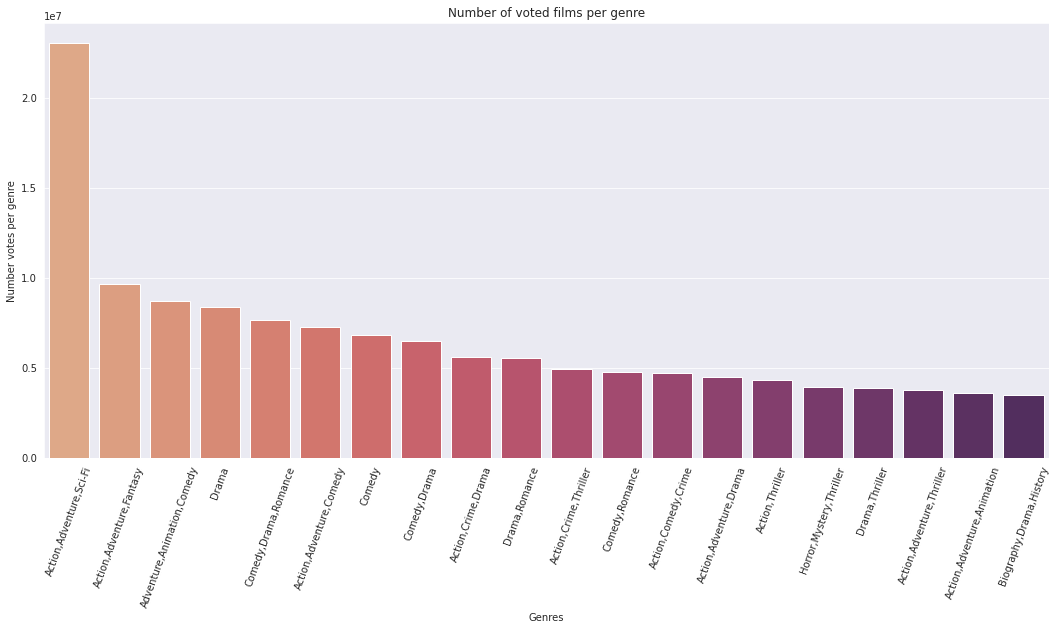

In [98]:
#Plotting total number of votes per genre
Genres = combined_df.groupby('genres')['numvotes'].sum().sort_values(ascending= False)[:20]
fig, ax = plt.subplots( figsize = ( 18,8))
ax = sns.barplot(x = Genres.index ,y = Genres, palette = 'flare')
ax.set_title("Number of voted films per genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Number votes per genre")
plt.xticks(rotation = 70)


* The 20 most voted films belonged to  different genres and not just one particular genre.

* Most films have a mixture of adventure,action and Science fiction

* It is also important to note that despite the fact that many documetaries were released they were not really voted in


In [46]:
print(lowest_votes['genres'].value_counts())
#This confirms that documentaries recieved the least number of votes among the 20 least voted films

Documentary                      6
Drama                            5
Comedy                           3
History                          1
Biography,Documentary,History    1
Documentary,Drama,History        1
Musical                          1
Comedy,Documentary,Drama         1
Western                          1
Name: genres, dtype: int64


In [97]:
Genre =combined_df.groupby('genres')['numvotes'].sum()


Text(0, 0.5, 'Count')

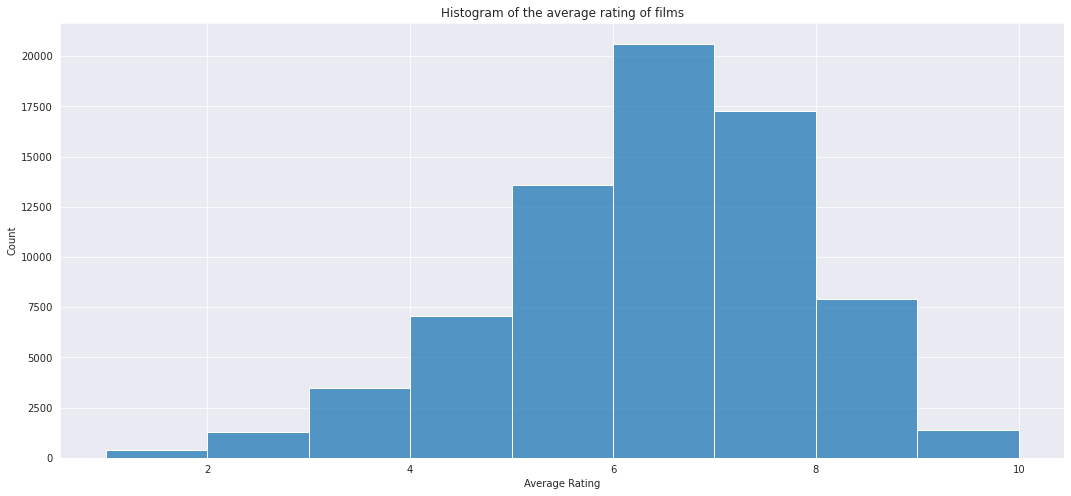

In [47]:
#Histogram for the average ratings of films
fig, ax = plt.subplots( figsize = ( 18,8))
ax = sns.histplot(x = combined_df['averagerating'],bins = 10, binwidth=1)
ax.set_title("Histogram of the average rating of films")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Count")
#plt.xticks(rotation = 80)

In [48]:
# Printing summary statistics of the average rating column
print(combined_df['averagerating'].describe())

count    73052.000000
mean         6.330930
std          1.474699
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


* The distribution of the average rating is slightly skewed to the left with the mean and median around 6.5

Text(0, 0.5, 'Worlwide gross')

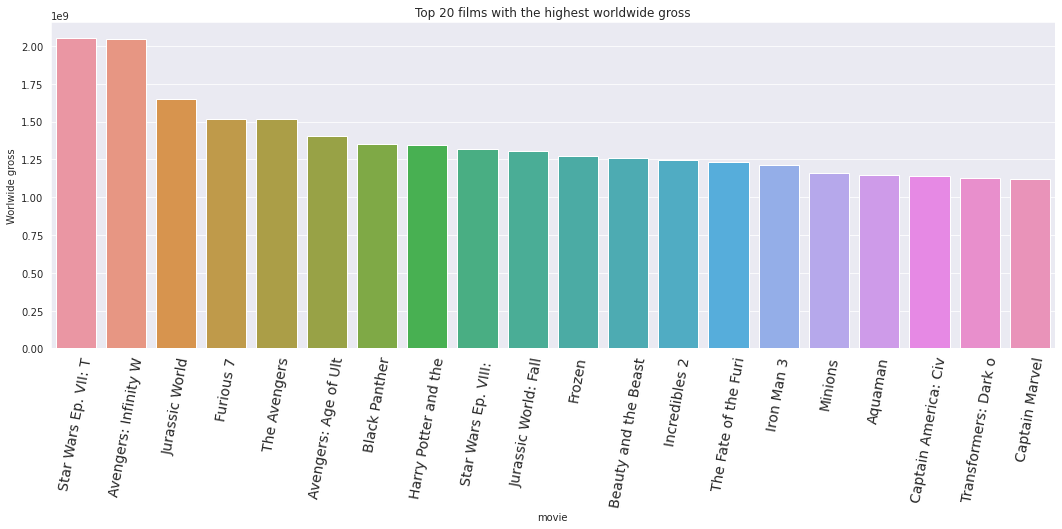

In [123]:
#Getting the average budget of creating a film
new_budget_df2 = new_budget_df.set_index('movie')
gross = new_budget_df2.worldwide_gross.sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.barplot(x=gross.index, y= gross)
ax.set_xticklabels([idx[:20] for idx in gross.index], rotation=80, fontsize = 14)
ax.set_title('Top 20 films with the highest worldwide gross')
ax.set_ylabel('Worlwide gross')

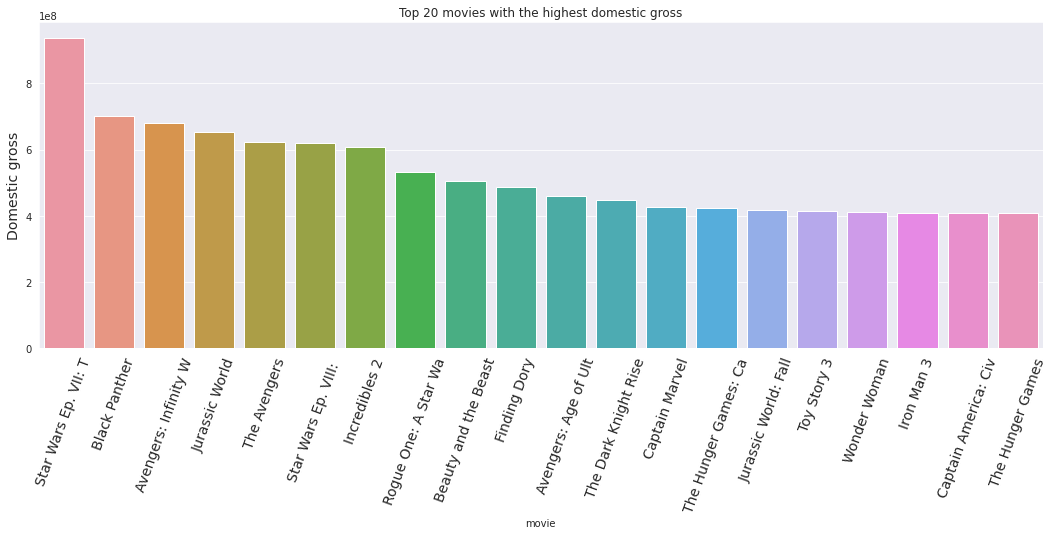

In [135]:
new_budget_df2 = new_budget_df.set_index('movie')
d_gross = new_budget_df2.domestic_gross.sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.barplot(x=d_gross.index, y= d_gross)
ax.set_xticklabels([idx[:20] for idx in d_gross.index], rotation=70, fontsize = 14)
ax.set_title('Top 20 movies with the highest domestic gross')
ax.set_ylabel('Domestic gross',fontsize = 14)
fig.savefig("Top 20 domestic.png")

* Star Wars Ep. VII: The Force Awakens was the most profilic film with a domestic gross of 936,662,225US dollars and 2,053,311,220US Dollrs  worlwide gross

In [51]:
#Mean of the production budget 
new_budget_df2['production_budget'].mean()

36533471.69371012

The average cost of producing a film is 36,533,471 million US dollars


In [136]:
# Top twenty movies with the highest worldwide gross
print(gross)

movie
Star Wars Ep. VII: The Force Awakens             2053311220
Avengers: Infinity War                           2048134200
Jurassic World                                   1648854864
Furious 7                                        1518722794
The Avengers                                     1517935897
Avengers: Age of Ultron                          1403013963
Black Panther                                    1348258224
Harry Potter and the Deathly Hallows: Part II    1341693157
Star Wars Ep. VIII: The Last Jedi                1316721747
Jurassic World: Fallen Kingdom                   1305772799
Frozen                                           1272469910
Beauty and the Beast                             1259199706
Incredibles 2                                    1242520711
The Fate of the Furious                          1234846267
Iron Man 3                                       1215392272
Minions                                          1160336173
Aquaman                           

In [64]:
#Top twenty movies with the highest domestic gross
print(d_gross)

movie
Star Wars Ep. VII: The Force Awakens    936662225
Black Panther                           700059566
Avengers: Infinity War                  678815482
Jurassic World                          652270625
The Avengers                            623279547
Star Wars Ep. VIII: The Last Jedi       620181382
Incredibles 2                           608581744
Rogue One: A Star Wars Story            532177324
Beauty and the Beast                    504014165
Finding Dory                            486295561
Avengers: Age of Ultron                 459005868
The Dark Knight Rises                   448139099
Captain Marvel                          426525952
The Hunger Games: Catching Fire         424668047
Jurassic World: Fallen Kingdom          417719760
Toy Story 3                             415004880
Wonder Woman                            412563408
Iron Man 3                              408992272
Captain America: Civil War              408084349
The Hunger Games                        4080

### Checking correlation


In [117]:
#Checking correlation between production budget and domestic gross and worlwide gross
print(new_budget_df[['production_budget','domestic_gross','worldwide_gross']].corr())

                   production_budget  domestic_gross  worldwide_gross
production_budget           1.000000        0.732027         0.793638
domestic_gross              0.732027        1.000000         0.946190
worldwide_gross             0.793638        0.946190         1.000000


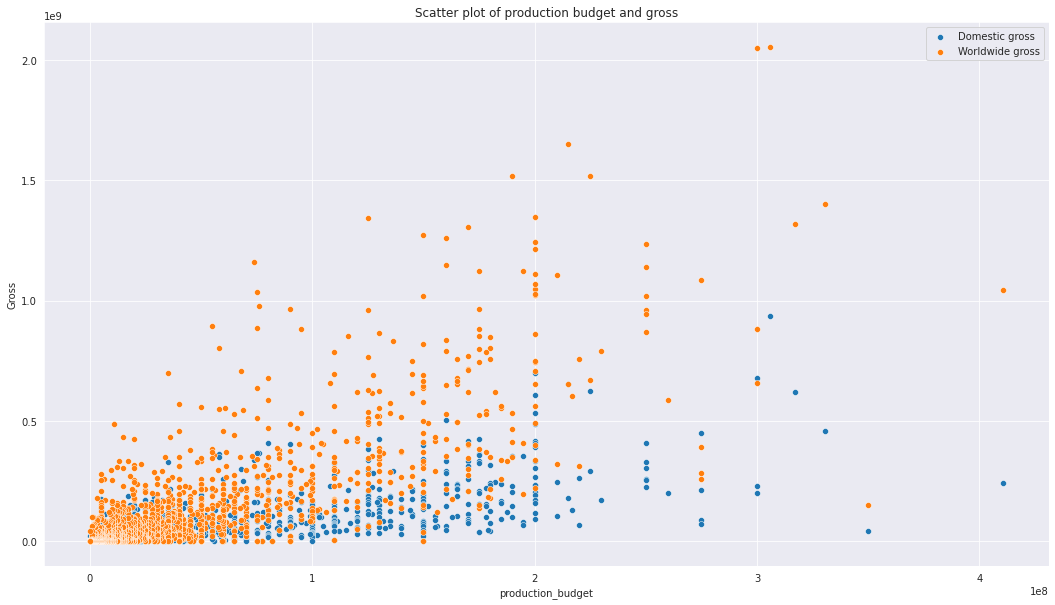

In [116]:
#Scatter plot of production budget vs domestic gross and worlwide gross
fig, axes = plt.subplots(figsize=(18,10))
axes= sns.scatterplot(x=new_budget_df['production_budget'], y= new_budget_df['domestic_gross'])
axes= sns.scatterplot(x=new_budget_df['production_budget'], y= new_budget_df['worldwide_gross'])

axes.set_title('Scatter plot of production budget and gross')
axes.set_ylabel('Gross')
axes.legend(['Domestic gross','Worldwide gross'])


* There is a strong positive correlation between the production budget and gross in both domestic and worlwide

### Conclusion

* The type of films with the most number of votes were from a combination of different genres(action,adventure and science fiction) and not just one particular genre

* There was a significant rise in the number of films released from 2010 to 2017,but there was significant drop in 2019.This could be due to the covid_19 pandemic

* Most films were averagely rated between 6 and 7 out of 10

* The average budget of producing a film is around 36.5 million

* The average runtime of a film was 94 minutes

* There is a strong relationship between the production budget and gross having a correlation coefficient of 0.732 with domestic gross aand 0.794 with worldwide gross


### Recomendations


* The head of Microsoft's new movie studio should consider creating films with different genres and not just one particular one.A combination of adventure,action and science fiction received more votes.

* The head of Microsoft's new movie should also ensure that they have enough capital because the average cost of producing a film is around 37 million US dollars.

* The head of Microsoft's new movie studio should consider creating films  that are not more than 2 hours

* There is also a significant return on investment due to the strong correlation between production budget and gross 


